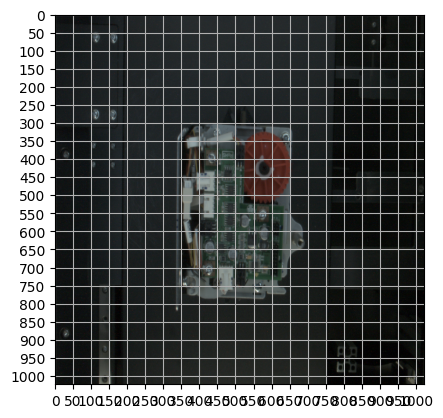

Crop 시작 x 좌표: 450
Crop 시작 y 좌표: 300
Crop 크기 (정사각형 한 변): 50


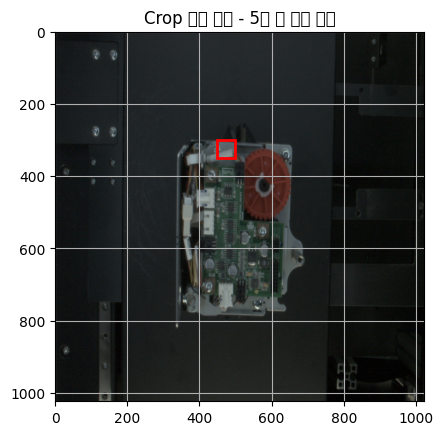

Saved: 그림1141.png
Saved: 그림1142.png
Saved: 그림1143.png
Saved: 그림1144.png
Saved: 그림1145.png
Saved: 그림1146.png
Saved: 그림1147.png
Saved: 그림1148.png
Saved: 그림1149.png
Saved: 그림1150.png
Saved: 그림1151.png
Saved: 그림1152.png
Saved: 그림1153.png
Saved: 그림1154.png
Saved: 그림1155.png
Saved: 그림1156.png
Saved: 그림1157.png
Saved: 그림1158.png
Saved: 그림1159.png
Saved: 그림1160.png
Saved: 그림1161.png
Saved: 그림1162.png
Saved: 그림1163.png
Saved: 그림1164.png
Saved: 그림1165.png
Saved: 그림1166.png
Saved: 그림1167.png
Saved: 그림1168.png
Saved: 그림1169.png
Saved: 그림1170.png
Saved: 그림1171.png
Saved: 그림1172.png
Saved: 그림1174.png

✅ 모든 Crop 이미지가 저장되었습니다: /content/drive/MyDrive/rem/trainA


In [24]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

# ==== 사용자 설정 ====
input_dir = "/content/drive/MyDrive/dataset/atm_dataset_1024x1024/front1_nick/rotation1"      # ✅ 원본 이미지 폴더 경로
output_dir = "/content/drive/MyDrive/rem/trainA"   # ✅ 결과 저장 폴더 경로

# ==== 디렉토리 준비 ====
os.makedirs(output_dir, exist_ok=True)

# ==== 이미지 목록 필터링 ====
image_files = [f for f in sorted(os.listdir(input_dir)) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
if not image_files:
    raise FileNotFoundError(f"{input_dir}에 유효한 이미지가 없습니다.")

# ==== 첫 번째 이미지로 Crop 좌표 설정 ====
first_img_path = os.path.join(input_dir, image_files[0])
img = Image.open(first_img_path)  # RGB 변환 생략

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_xticks(range(0, img.width, 50))
ax.set_yticks(range(0, img.height, 50))
plt.grid(True)
plt.show()

# 🔽 이미지 유지 시간
time.sleep(1)
plt.close(fig)

# ==== 좌표 입력 ====
x = int(input("Crop 시작 x 좌표: "))
y = int(input("Crop 시작 y 좌표: "))
size = int(input("Crop 크기 (정사각형 한 변): "))

# ==== 시각적 확인 ====
fig2, ax2 = plt.subplots()
ax2.imshow(img)
rect = patches.Rectangle((x, y), size, size, linewidth=2, edgecolor='red', facecolor='none')
ax2.add_patch(rect)
plt.grid(True)
plt.title("Crop 영역 확인 - 5초 후 자동 종료")
plt.show()

time.sleep(1)
plt.close(fig2)

# ==== 일괄 Crop 수행 ====
for fname in image_files:
    img_path = os.path.join(input_dir, fname)
    img = Image.open(img_path)
    cropped = img.crop((x, y, x + size, y + size))
    cropped.save(os.path.join(output_dir, fname))
    print(f"Saved: {fname}")

print(f"\n✅ 모든 Crop 이미지가 저장되었습니다: {output_dir}")


In [ ]:
from PIL import Image
import os
from google.colab import drive


# ==== 사용자 설정 ====
background_dir = "/content/drive/MyDrive/dataset/atm_dataset_1024x1024/main/rotation3"   # 정상 이미지 디렉토리
patch_dir = "/content/drive/MyDrive/result/train_set_10/main_rotation3/images/fake_B"        # 결함 이미지 디렉토리
output_dir = "/content/drive/MyDrive/nick_agu_10"       # 저장할 디렉토리
patch_resize_size = (50, 50)                                        # 붙이기 전 결함 이미지 크기

# ==== 저장 디렉토리 생성 ====
os.makedirs(output_dir, exist_ok=True)

# ==== 파일명 기준으로 1:1 매칭 ====
background_files = sorted([f for f in os.listdir(background_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))])
patch_files = sorted([f for f in os.listdir(patch_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))])

# 공통된 파일명 기준 매핑
common_files = sorted(set(background_files) & set(patch_files))
if not common_files:
    raise ValueError("두 디렉토리에 공통된 파일명이 없습니다.")

# ==== 사용자 입력: 붙일 위치 ====
patch_x = int(input("패치 x 좌표 입력: "))
patch_y = int(input("패치 y 좌표 입력: "))

# ==== 이미지 패치 처리 ====
for fname in common_files:
    bg_path = os.path.join(background_dir, fname)
    patch_path = os.path.join(patch_dir, fname)

    # 이미지 열기
    bg_img = Image.open(bg_path)
    patch_img = Image.open(patch_path)

    # 패치 이미지 리사이즈 (50x50)
    patch_resized = patch_img.resize(patch_resize_size, Image.BICUBIC)

    # 패치 붙이기
    bg_img.paste(patch_resized, (patch_x, patch_y))

    # 저장
    save_path = os.path.join(output_dir, f"patched_{fname}")
    bg_img.save(save_path)
    print(f"✅ Saved: {save_path}")


패치 x 좌표 입력: 430
패치 y 좌표 입력: 430
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-06.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-09.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-12.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-15.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-20.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-33.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-36.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-39.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-41.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-44.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/patched_Image__2025-03-27__15-36-48.png
✅ Saved: /content/drive/MyDrive/nick_agu_10/